In [32]:
import pandas as pd
data = pd.read_csv('E:/KULIAH/MAGISTER/ASDOS_DATMIN/iris.csv', sep=',')
data = data.drop(columns = ['Unnamed: 0'])

In [33]:
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [34]:
# Ngasih label 0 = setosa, 1 = versicolor, 2 = virginica
from sklearn.preprocessing import LabelEncoder
data['Label'] = LabelEncoder().fit_transform(data['Species'])

In [35]:
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Label
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [36]:
from sklearn.model_selection import train_test_split
# Definisi Y
y = data['Label']

# Definisi X
X = data.drop(['Species','Label'], axis=1)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [37]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [38]:
# fit train set pake Gaussian Naive Bayes
nb.fit(X_train, y_train)

GaussianNB()

In [39]:
# compute the accuracy of train set
nb.score(X_train, y_train)

0.9642857142857143

In [40]:
classif_name = ['NB']
y_predict = {}
y_predict['NB'] = nb.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score
# get the species names
species = data['Species'].unique()

# create an empty dictionary for confusion matrices
conf_matrix = {}

# add new keys and assign the confusion matrices results
for name in classif_name:
    conf_matrix[name] = pd.DataFrame(data=confusion_matrix(y_test, y_predict[name]), 
                                     columns=species, 
                                     index=species)

In [42]:
conf_matrix['NB']

,setosa,versicolor,virginica
setosa,16,0,0
versicolor,0,8,0
virginica,0,2,12


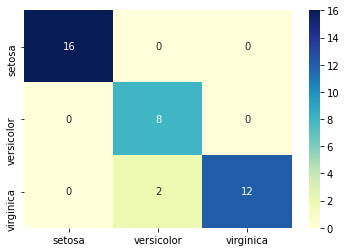

In [43]:
# create heatmap for NB confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(conf_matrix['NB'], annot=True, cmap="YlGnBu")
plt.show()

In [31]:
for name in classif_name:
    print('{0} accuracy = {1:.4f}'.format(name, accuracy_score(y_test, y_predict[name])))

NB accuracy = 0.9474
